In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools

# Incoherent feedforward

In [0]:
# Parámetros iniciales

t_f = 50
t_div = 1000
t = np.linspace(0, t_f, t_div)
k1 = 10
k2 = 100
k3 = 0.1
K3 = 0.001
k4 = 1
u0 = [0.5, 0.02]
inp_values = [0.2, 0.4, 0.6, 0.4, 0.2]

# numero de veces que se repite cada elemento de inp_values
fold = int(t_div/len(inp_values))
# lista con valores de input repe (fold veces cada valor)
inp = list(itertools.chain.from_iterable(itertools.repeat(x, fold) for x in inp_values))

Se define la función con los ODEs que aparecen en el paper, permitiendo que se produzcan cambios en el input en función del tiempo.

In [0]:
def incoh_feed(u, t_, k1, k2, k3, K3, k4):
    
    a, b = u # Concentraciones iniciales
    
    # Definimos el valor de input que vamos a usar a tiempo t_

    if t_ < t[fold] or t_ > t[fold*4]:
        inp_t = inp_values[0]
    elif t_ < t[fold*2] or t_ > t[fold*3]:
        inp_t = inp_values[1]
    else:
        inp_t = inp_values[2]
    
    # Resolución de ODEs
    da = k1*inp_t*(1-a) - k2*a*b
    db = k3*inp_t*((1-b)/(K3+1-b))-k4*b
    
    return da, db

Resolvemos los sistemas con la función odeint.

In [0]:
params = (k1, k2, k3, K3, k4) # Tupla con argumentos que pasan a function1

sol = odeint(incoh_feed, u0, t, params)

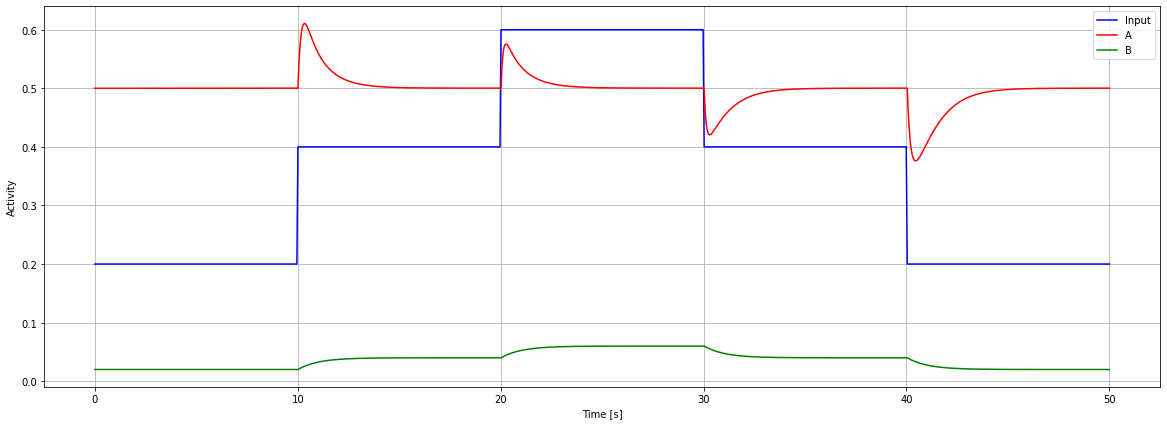

In [30]:
plt.subplots(figsize=(20,7))

plt.plot(t, inp, 'b', label='Input')
plt.plot(t, sol[:, 0], 'r', label='A')
plt.plot(t, sol[:, 1], 'g', label='B')
plt.title("")
plt.xlabel("Time [s]")
plt.ylabel("Activity")
plt.legend(loc='best')
plt.grid()
plt.show()

Se consiguen las mismas gráficas que aparecen en el artículo.

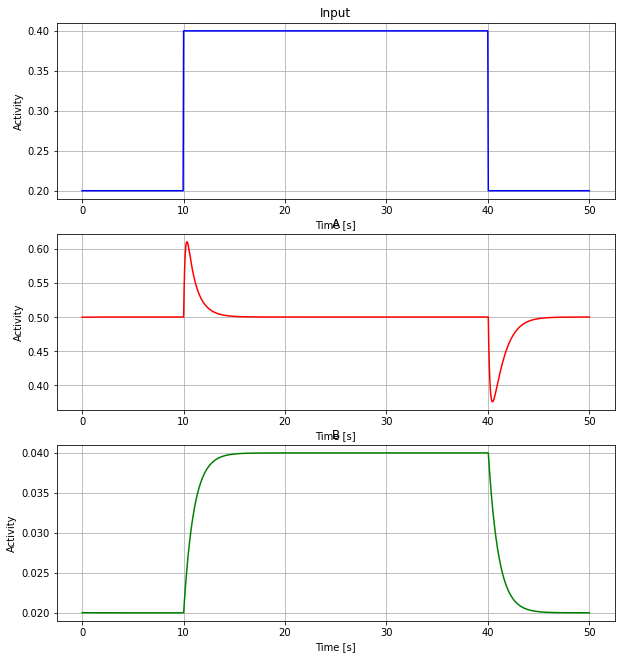

In [6]:
fig, axs = plt.subplots(3, 1, figsize=(10,11))

axs[0].plot(t, inp, 'b')
axs[0].set_title('Input')
axs[1].plot(t, sol[:, 0], 'r')
axs[1].set_title('A')
axs[2].plot(t, sol[:, 1], 'g')
axs[2].set_title('B')

for ax in axs.flat:
    ax.set(xlabel='Time [s]', ylabel='Activity')
    ax.grid()

Se alteran diferentes parámetros para conocer la respuesta del sistema.

En primer lugar modificamos el input, partiendo de diferentes concentraciones iniciales y provocando diferentes intervalos de cambio (tanto crecientes como decrecientes).

In [0]:
### Diferentes cambios de input

t_f = 49
t_div = 1000
t = np.linspace(0, t_f, t_div)
k1 = 10
k2 = 100
k3 = 0.1
K3 = 0.001
k4 = 1
u0 = [0.5, 0.02]

# numero de veces que se repite cada elemento de inp_values
fold = int(t_div/len(inp_values))
# lista con valores de input repe (fold veces cada valor)
inp_2 = list(itertools.chain.from_iterable(itertools.repeat(x, fold) for x in inp_values))

In [0]:
inp_values = [0.2, 0.2, 0.6, 0.2, 0.2]
params = (k1, k2, k3, K3, k4) # Tupla con argumentos que pasan a function1

sol_02_06 = odeint(incoh_feed, u0, t, params)

inp_values = [0.2, 0.2, 0.4, 0.2, 0.2]
params = (k1, k2, k3, K3, k4) # Tupla con argumentos que pasan a function1

sol_02_04 = odeint(incoh_feed, u0, t, params)

inp_values = [0.4, 0.4, 0.6, 0.4, 0.4]
params = (k1, k2, k3, K3, k4) # Tupla con argumentos que pasan a function1

sol_04_06 = odeint(incoh_feed, u0, t, params)

inp_values = [0.4, 0.4, 0.8, 0.4, 0.4]
params = (k1, k2, k3, K3, k4) # Tupla con argumentos que pasan a function1

sol_04_08 = odeint(incoh_feed, u0, t, params)

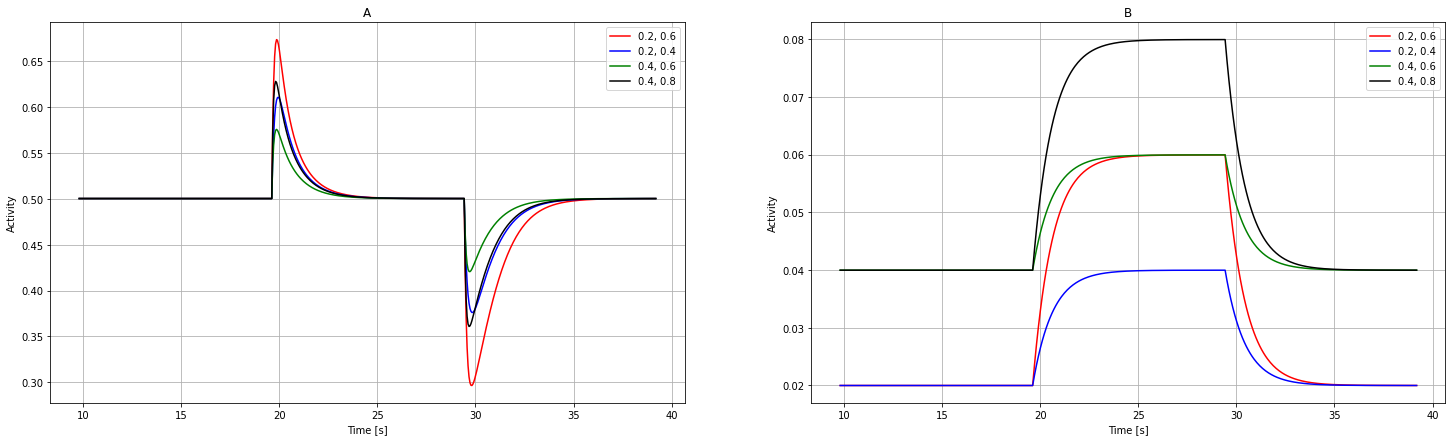

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(25,7))

axs[0].plot(t[200:800], sol_02_06[200:800, 0], 'r', label='0.2, 0.6')
axs[0].plot(t[200:800], sol_02_04[200:800, 0], 'b', label='0.2, 0.4')
axs[0].plot(t[200:800], sol_04_06[200:800, 0], 'g', label='0.4, 0.6')
axs[0].plot(t[200:800], sol_04_08[200:800, 0], 'k', label='0.4, 0.8')
axs[0].set_title('A')
axs[1].plot(t[200:800], sol_02_06[200:800, 1], 'r', label='0.2, 0.6')
axs[1].plot(t[200:800], sol_02_04[200:800, 1], 'b', label='0.2, 0.4')
axs[1].plot(t[200:800], sol_04_06[200:800, 1], 'g', label='0.4, 0.6')
axs[1].plot(t[200:800], sol_04_08[200:800, 1], 'k', label='0.4, 0.8')
axs[1].set_title('B')

for ax in axs.flat:
    ax.set(xlabel='Time [s]', ylabel='Activity')
    ax.legend(loc='best')
    ax.grid()

Independientemente del input, la $[A_{eq}]$ se mantiene constante. Sin embargo, $[B_{eq}]$ sí depende del input que se recibe. Es precisamente esta variación de B lo que permite que A sea constante tras el pulso.

La respuesta de $[B]$ al cambio de input es proporcional a la diferencia de valores, mientras que el comportamiento es diferente para A. Cuando la diferencia de input es mayor, el pico es más elevado. Por el contrario, cuando los intervalos de cambio son iguales, la altura del pico depende de los valores de Input. Cuando los valores son más bajos (de 0.2 a 0.4) el pico es más alto que cuando los valores son superiores (0.4, 0.6), lo que sugiere que el sistema es más sensible a bajas concentraciones de input.

Otro parámetro que es posible alterar es $k_3$, que además es clave en el sistema, puesto que regula la velocidad de activación de B.

In [0]:
t_f = 50
t_div = 1000
t = np.linspace(0, t_f, t_div)
k1 = 10
k2 = 100
#k3 = 0.1
k3 = [1, 10]
K3 = 0.001
k4 = 1
u0 = [0.5, 0.02]
inp_values = [0.2, 0.4, 0.6, 0.4, 0.2]

# numero de veces que se repite cada elemento de inp_values
fold = int(t_div/len(inp_values))
# lista con valores de input repe (fold veces cada valor)
inp = list(itertools.chain.from_iterable(itertools.repeat(x, fold) for x in inp_values))

In [0]:
params = (k1, k2, k3[0], K3, k4) # Tupla con argumentos que pasan a function1
sol_2 = odeint(incoh_feed, u0, t, params)

params = (k1, k2, k3[1], K3, k4) # Tupla con argumentos que pasan a function1
sol_3 = odeint(incoh_feed, u0, t, params)

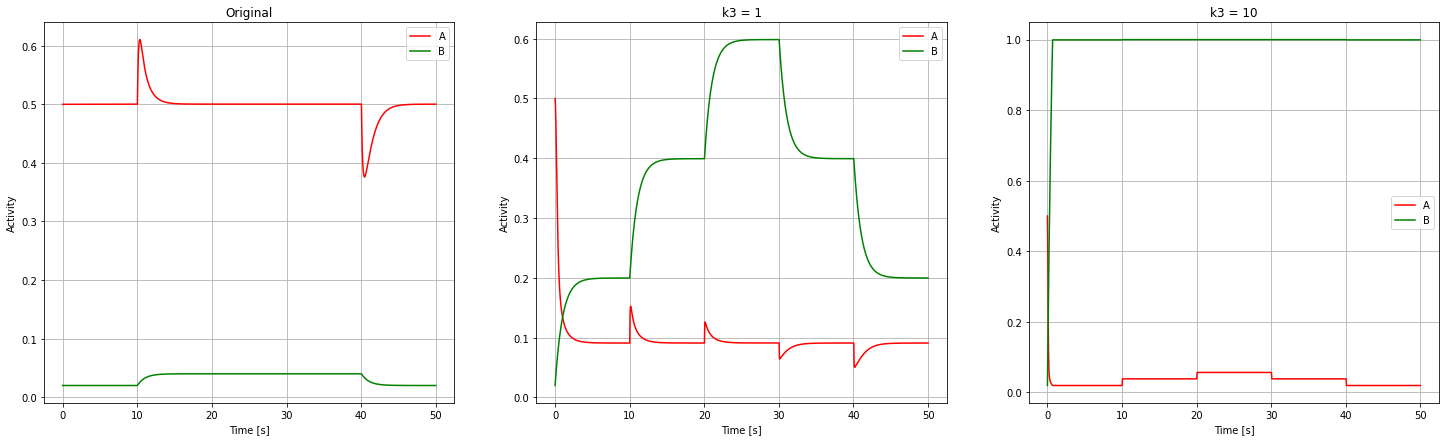

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(25,7))

axs[0].plot(t, sol[:, 0], 'r', label='A')
axs[0].plot(t, sol[:, 1], 'g', label='B')
axs[0].set_title('Original')

axs[1].plot(t, sol_2[:, 0], 'r', label='A')
axs[1].plot(t, sol_2[:, 1], 'g', label='B')
axs[1].set_title('k3 = 1')

axs[2].plot(t, sol_3[:, 0], 'r', label='A')
axs[2].plot(t, sol_3[:, 1], 'g', label='B')
axs[2].set_title('k3 = 10')

for ax in axs.flat:
    ax.set(xlabel='Time [s]', ylabel='Activity')
    ax.legend(loc='best')
    #ax.set_ylim([0.9975, 1.001])
    ax.grid()

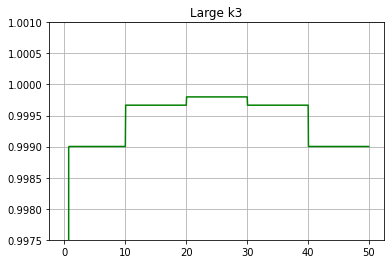

In [13]:
plt.plot(t, sol_3[:, 1], 'g', label='B')
plt.title('Large k3')
plt.ylim([0.9975, 1.001])
plt.grid()
plt.show()

Cuando $k_3$ aumenta, la actividad máxima que puede alcanzar B también crece, lo que a su vez provoca que la actividad de A disminuya y que sus picos sean menos altos. Cuando se llega a una $k_3$ muy alta, los picos de A desaparecen y deja de haber una adaptación casi perfecta del output para producirse una función de escalera.

El último parámetro que hemos alterado es $k_4$, relacionado con la inactivación o degradación de B.

In [0]:
t_f = 50
t_div = 1000
t = np.linspace(0, t_f, t_div)
k1 = 10
k2 = 100
k3 = 0.1
K3 = 0.001
#k4 = 1
k4 = 0.2
u0 = [0.5, 0.02]
inp_values = [0.2, 0.4, 0.6, 0.4, 0.2]

# numero de veces que se repite cada elemento de inp_values
fold = int(t_div/len(inp_values))
# lista con valores de input repe (fold veces cada valor)
inp = list(itertools.chain.from_iterable(itertools.repeat(x, fold) for x in inp_values))

In [0]:
params = (k1, k2, k3, K3, k4) # Tupla con argumentos que pasan a function1

sol_2 = odeint(incoh_feed, u0, t, params)

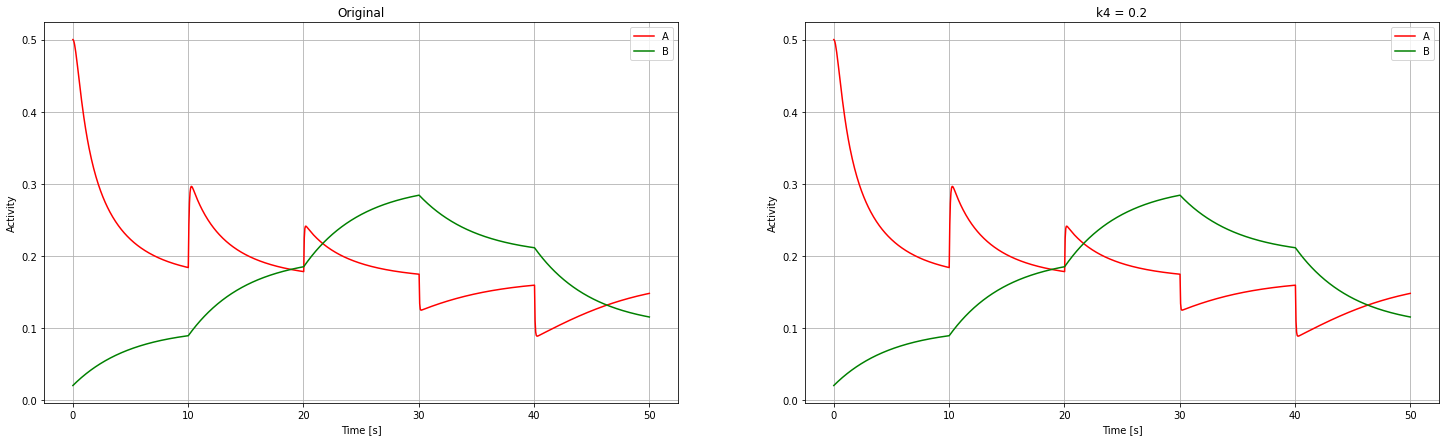

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(25,7))

axs[0].plot(t, sol_2[:, 0], 'r', label='A')
axs[0].plot(t, sol_2[:, 1], 'g', label='B')
axs[0].set_title('Original')

axs[1].plot(t, sol_2[:, 0], 'r', label='A')
axs[1].plot(t, sol_2[:, 1], 'g', label='B')
axs[1].set_title('k4 = 0.2')

for ax in axs.flat:
    ax.set(xlabel='Time [s]', ylabel='Activity')
    ax.legend(loc='best')
    #ax.set_ylim([0.9975, 1.001])
    ax.grid()

El sistema deja de mostrar adaptación cuando $k_4$ disminuye. En este caso, lo que se observa es que la velocidad de degradación de B se reduce, lo que provoca que se necesite más tiempo para que la activación y la inhibición de B se igualen, estabilizando tanto la actividad de B como de A.

Si eliminamos el pulso intermedio, sucede esto:

In [0]:
t_f = 50
t_div = 1000
t = np.linspace(0, t_f, t_div)
k1 = 10
k2 = 100
k3 = 0.1
K3 = 0.001
#k4 = 1
k4 = 0.2
u0 = [0.5, 0.02]
inp_values = [0.2, 0.4, 0.4, 0.4, 0.2]

# numero de veces que se repite cada elemento de inp_values
fold = int(t_div/len(inp_values))
# lista con valores de input repe (fold veces cada valor)
inp = list(itertools.chain.from_iterable(itertools.repeat(x, fold) for x in inp_values))

In [0]:
params = (k1, k2, k3, K3, k4) # Tupla con argumentos que pasan a function1

sol_2 = odeint(incoh_feed, u0, t, params)

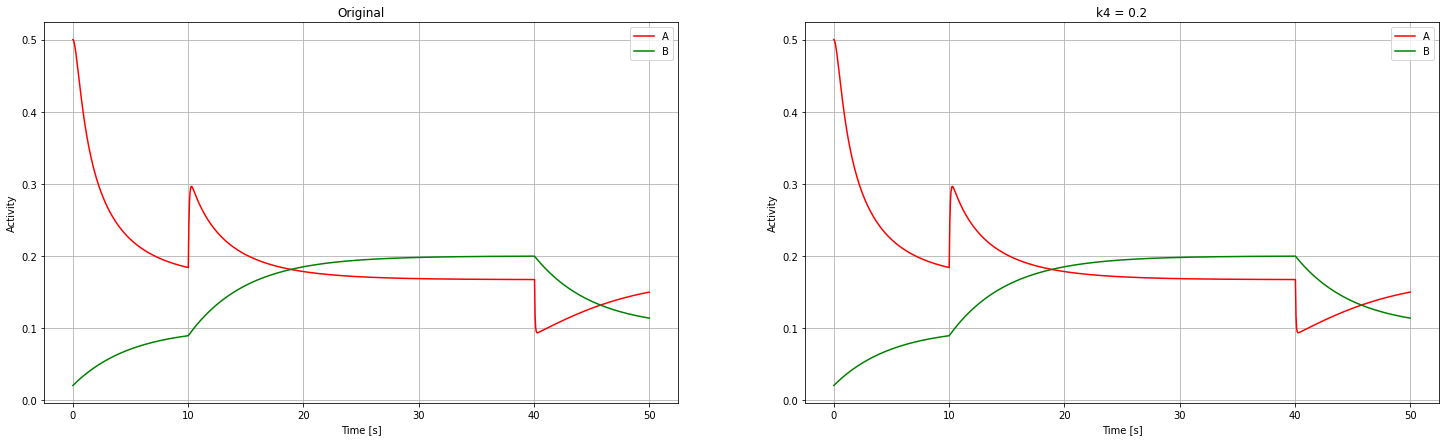

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(25,7))

axs[0].plot(t, sol_2[:, 0], 'r', label='A')
axs[0].plot(t, sol_2[:, 1], 'g', label='B')
axs[0].set_title('Original')

axs[1].plot(t, sol_2[:, 0], 'r', label='A')
axs[1].plot(t, sol_2[:, 1], 'g', label='B')
axs[1].set_title('k4 = 0.2')

for ax in axs.flat:
    ax.set(xlabel='Time [s]', ylabel='Activity')
    ax.legend(loc='best')
    #ax.set_ylim([0.9975, 1.001])
    ax.grid()

Al haber más tiempo entre los cambios de input, el sistema tiene tiempo suficiente para estabilizarse, aunque se muestra una adaptación peor a la original.